In [5]:
# freeboard distribution for one specific date - would probs be better to look at an average

In [ ]:
import numpy as np
import glob
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
from netCDF4 import Dataset
import warnings
warnings.filterwarnings("ignore")

In [2]:
date = '20191230'
season = '2019-2020'
datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/'       
sats = ['CS2_S3_GPOD/MERGE/','Bristol_LARM/CS2/freeboard/','CS2_CPOM/','GPOD_Bristol/CS2/','GPOD_Bristol/S3/','AK_CPOM/','IS2/','Bristol_LARM/AK/']
names = ['CS2_S3_GPOD','CS2_Bristol','CS2_CPOM','CS2_GPOD_Bristol','S3_GPOD_Bristol','AK_CPOM','IS2','AK_Bristol']

Text(0.5, 0, 'freeboard (m)')

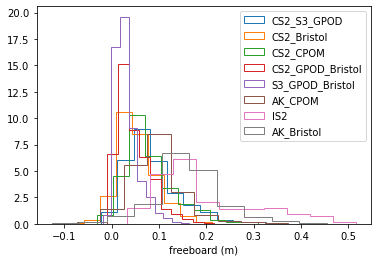

In [3]:
dist = {}
for sat,name in zip(sats,names):
    dist[name] = np.load(datapath+sat+'FB_interp_'+season+'_50km_'+date+'.npy')

for i in names:
    x = plt.hist(dist[i].ravel(), histtype='step', density = True, bins= 10, label = i) 
plt.legend()
plt.xlabel('freeboard (m)')

# by region

Kara :


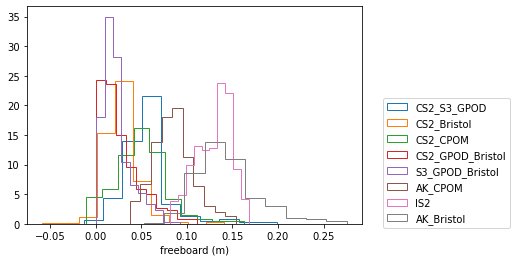

Laptev :


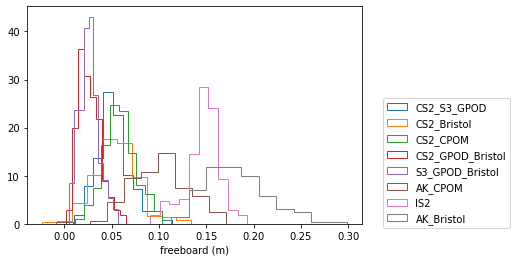

E. Siberian :


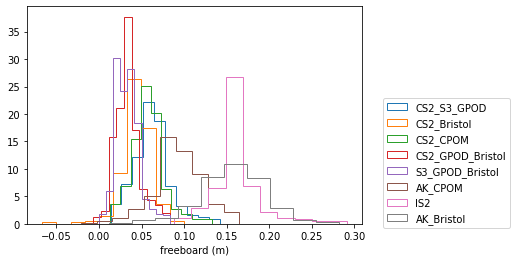

Chukchi :


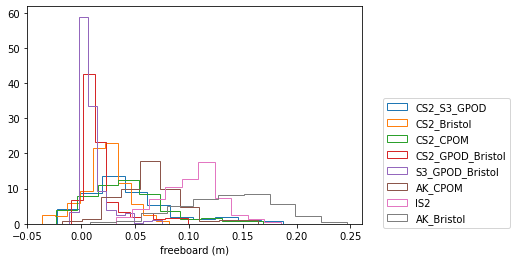

 Beaufort :


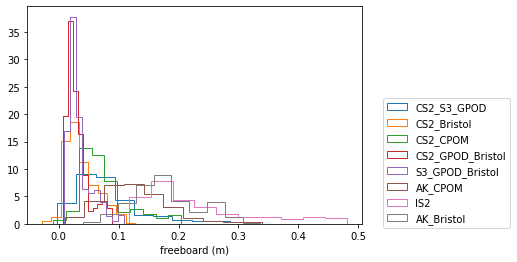

Can. Arch :


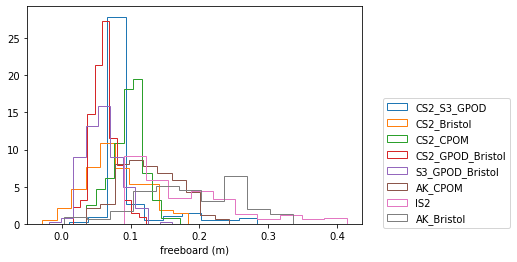

Central Arctic :


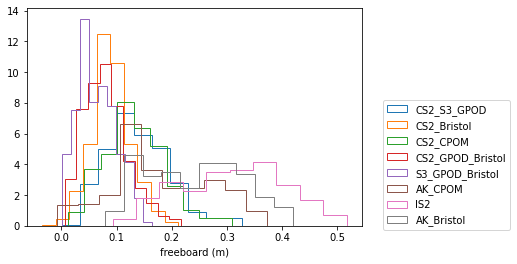

In [4]:
x_WG = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/x_50km.npy') # load Will's grid, 161 x 161 array
y_WG = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/y_50km.npy')
nsidc_lat = np.fromfile('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/psn25lats_v3.dat',dtype='<i4').reshape(448,304)/100000
nsidc_lon = np.fromfile('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/psn25lons_v3.dat',dtype='<i4').reshape(448,304)/100000
m = Basemap(projection='npstere',boundinglat=60,lon_0=0, resolution='l',round=True)
nsidc_x,nsidc_y = m(nsidc_lon,nsidc_lat)
file = Dataset('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/NSIDC_regions_Masks-2.nc')
mask = np.array(file['mask']).transpose(1,0).astype('float32')
mask_valuess = griddata((nsidc_x.ravel(),nsidc_y.ravel()),mask.ravel(),(x_WG,y_WG),'nearest')

dist = {}

for regs, reg_name in zip([[9], [10], [11], [12], [13], [14], [15]], 
                      ['Kara', 'Laptev', 'E. Siberian', 'Chukchi',' Beaufort', 'Can. Arch', 'Central Arctic']):
    print(reg_name,':')
    for sat,name in zip(sats,names):

        try:
            a = np.load(datapath+sat+'FB_interp_'+season+'_50km_'+date+'.npy').copy()
            reg = np.where((mask_valuess[:-1,:-1]==regs))
            dist[name] = a[reg]
        except: pass
        try:
            plt.hist(dist[name].ravel(), histtype='step', density = True, bins= 10, label = name)  
            plt.legend(bbox_to_anchor = (1.05, 0.6))
        except: pass
    plt.xlabel('freeboard (m)')
    plt.show()